In [1]:
import pandas as pd
survey_df = pd.read_csv(r'E:\PYTHON PRAC\Lantern\surveys.csv')

# Starting with Pandas  
### Challenge - Plots
1. Create a plot of average weight across all species per plot.
2. Create a plot of total males versus total females for the entire dataset.

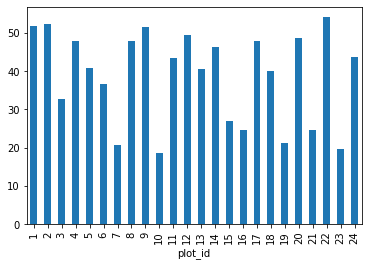

In [21]:
%matplotlib inline 
survey_df.groupby(['plot_id']).mean()['weight'].plot(kind='bar')

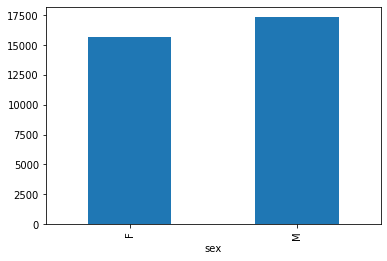

In [20]:
survey_df.groupby(['sex']).count()['record_id'].plot(kind='bar')

# Indexing, Slicing and Subsetting DataFrames  
### Challenge - Putting it all together
1. Create a new DataFrame that only contains observations with sex values that are not female or male. Assign each sex value in the new DataFrame to a new value of ‘x’. Determine the number of null values in the subset.

In [32]:
survey_df_subx = survey_df[~((survey_df['sex']=='M')|(survey_df['sex']=='F'))]
survey_df_subx.loc[:,['sex']] = 'x'
survey_df_subx.isnull().sum()

record_id             0
month                 0
day                   0
year                  0
plot_id               0
species_id          763
sex                   0
hindfoot_length    2443
weight             2410
dtype: int64

2. Create a new DataFrame that contains only observations that are of sex male or female and where weight values are greater than 0. Create a stacked bar plot of average weight by plot with male vs female values stacked for each plot.

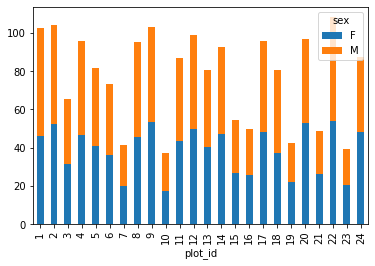

In [38]:
survey_df_subs = survey_df[(survey_df['weight']>0)&((survey_df['sex']=='M')|(survey_df['sex']=='F'))]
survey_df_subs.groupby(['plot_id','sex']).mean()['weight'].unstack().plot(kind='bar',stacked=True)

# Titanic Data Analyses

In [41]:
titanic_df = pd.read_csv(r'E:\PYTHON PRAC\Lantern\Titanic.csv')
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [47]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [49]:
titanic_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [50]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [52]:
titanic_df.drop('Cabin',axis=1,inplace=True)

In [63]:
titanic_df.isnull().sum()
titanic_df.dropna(inplace=True)
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [65]:
titanic_df.shape

(712, 11)

In [69]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


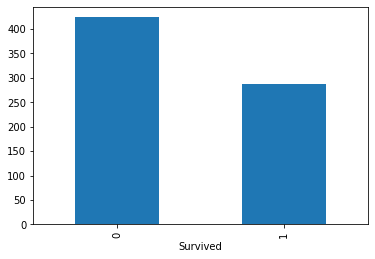

In [74]:
titanic_df.groupby('Survived').count()['PassengerId'].plot(kind='bar')

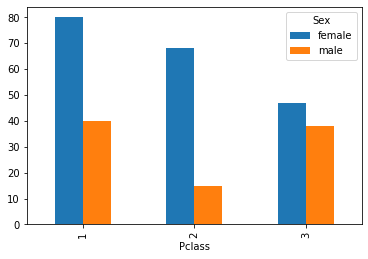

In [93]:
titanic_df[titanic_df['Survived']==1].groupby(['Pclass','Sex']).count()['PassengerId'].unstack().plot(kind='bar')

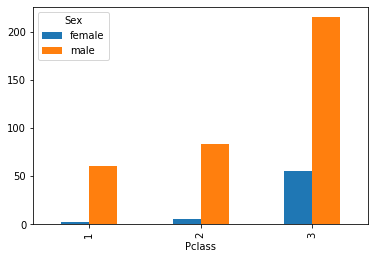

In [96]:
titanic_df[~(titanic_df['Survived']==1)].groupby(['Pclass','Sex']).count()['PassengerId'].unstack().plot(kind='bar')

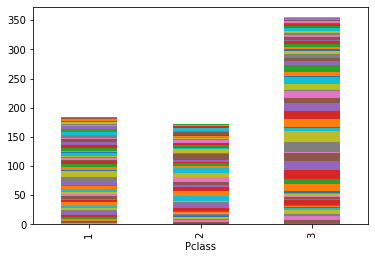

In [138]:
titanic_df.groupby(['Pclass','Age']).count()['PassengerId'].unstack().plot(kind='bar', 
                                                                           stacked=True, legend=None)

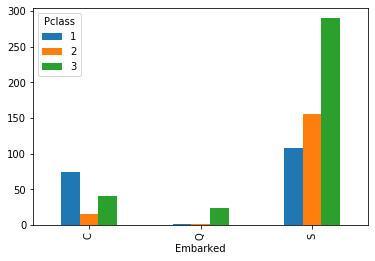

In [121]:
titanic_df.groupby(['Embarked','Pclass']).count()['PassengerId'].unstack().plot(kind='bar')

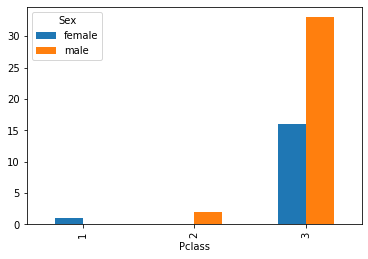

In [133]:
titanic_df[(titanic_df['Age']<18)&(titanic_df['Survived']==0)].groupby(['Pclass','Sex']).count()[
    'PassengerId'].unstack().plot(kind='bar')

# Movie Rating Data

In [2]:
ratings_df = pd.read_csv('http://files.grouplens.org/datasets/movielens/ml-100k/u.data', 
                         sep='\t' ,header =None )
ratings_df.columns = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings_df.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
user_df = pd.read_csv('http://files.grouplens.org/datasets/movielens/ml-100k/u.user', 
                         sep='|' ,header =None )
user_df.columns = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
user_df.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [4]:
movie_df = pd.read_csv('http://files.grouplens.org/datasets/movielens/ml-100k/u.item', sep ='|', 
                       encoding='ANSI', header=None)
col = list(range(5,24))
movie_df.drop(col,axis=1,inplace=True)
movie_df.columns = ['movie_id', 'title', 'release_date','video_release_date', 'imdb_url']
movie_df.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


### Users aged 40 and male

In [72]:
user_df[(user_df['age']>40)&(user_df['sex']=='M')].count()['user_id']

189

### Mean age of female programmers

In [6]:
user_df['occupation'].unique()

array(['technician', 'other', 'writer', 'executive', 'administrator',
       'student', 'lawyer', 'educator', 'scientist', 'entertainment',
       'programmer', 'librarian', 'homemaker', 'artist', 'engineer',
       'marketing', 'none', 'healthcare', 'retired', 'salesman', 'doctor'],
      dtype=object)

In [199]:
user_df[(user_df['sex']=='F')].mean()['age']

33.81318681318681

### Find diligent users

In [15]:
ratings_df.groupby('user_id').count()['movie_id'].sort_values(ascending = False)[:10]

user_id
405    737
655    685
13     636
450    540
276    518
416    493
537    490
303    484
234    480
393    448
Name: movie_id, dtype: int64

### The average rating per movie

In [18]:
ratings_df.groupby('movie_id').mean()['rating'][:10]

movie_id
1     3.878319
2     3.206107
3     3.033333
4     3.550239
5     3.302326
6     3.576923
7     3.798469
8     3.995434
9     3.896321
10    3.831461
Name: rating, dtype: float64

### Movie titles with highest ratings

In [36]:
hrating = ratings_df.groupby('movie_id').mean()['rating'].sort_values(ascending = False)
movie_rating_df = movie_df.set_index('movie_id').copy()
movie_rating_df.reindex(index = hrating.index)[:5]

,title,release_date,video_release_date,imdb_url
movie_id,,,,
1293,Star Kid (1997),16-Jan-1998,NaN,http://us.imdb.com/M/title-exact?imdb-title-12...
1467,"Saint of Fort Washington, The (1993)",01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Saint%20of%20...
1653,Entertaining Angels: The Dorothy Day Story (1996),27-Sep-1996,NaN,http://us.imdb.com/M/title-exact?Entertaining%...
814,"Great Day in Harlem, A (1994)",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Great%20Day%2...
1122,They Made Me a Criminal (1939),01-Jan-1939,NaN,http://us.imdb.com/M/title-exact?They%20Made%2...


 ### The average rating per user

In [39]:
ratings_df.groupby('user_id').mean()['rating'].head()

user_id
1    3.610294
2    3.709677
3    2.796296
4    4.333333
5    2.874286
Name: rating, dtype: float64

### List  of all occupations if they are male or female dominant

In [71]:
dominance_df = user_df.groupby(['occupation','sex']).count()['user_id'].unstack()
dominance_df.fillna(0, inplace=True)
dominance_df['value'] = dominance_df['F'] - dominance_df['M']

def domin(row):
    if row['value'] < 0:
        return 'Male'
    else:
        return 'Female'

dominance_df['dominance'] = dominance_df.apply(lambda row : domin(row), axis=1)
dominance_df.drop('value', axis=1, inplace = True)
dominance_df

sex,F,M,dominance
occupation,,,
administrator,36.0,43.0,Male
artist,13.0,15.0,Male
doctor,0.0,7.0,Male
educator,26.0,69.0,Male
engineer,2.0,65.0,Male
entertainment,2.0,16.0,Male
executive,3.0,29.0,Male
healthcare,11.0,5.0,Female
homemaker,6.0,1.0,Female
